<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Dataframe & Python

### LAP Parte 1: “10 minutes to pandas"

https://pandas.pydata.org/docs/user_guide/10min.html

Sugestão: Colocar a página do Cookbook lado a lado com este notebook para realizar as operações.

In [1]:
import numpy as np
import pandas as pd

In [ ]:
pd.show_versions()

### Object creation

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [7]:
df

,A,B,C,D
2013-01-01,1.451156,-0.963011,-0.669299,0.335018
2013-01-02,0.178113,0.520856,-1.532344,0.381326
2013-01-03,1.152078,1.409488,0.026800,0.809239
2013-01-04,0.101741,0.438111,-0.431844,-1.350876
2013-01-05,0.010714,-0.229172,0.413374,0.872812
2013-01-06,0.469168,-0.908946,-0.017549,0.986083


In [8]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Viewing data

In [11]:
df.head()


,A,B,C,D
2013-01-01,1.451156,-0.963011,-0.669299,0.335018
2013-01-02,0.178113,0.520856,-1.532344,0.381326
2013-01-03,1.152078,1.409488,0.026800,0.809239
2013-01-04,0.101741,0.438111,-0.431844,-1.350876
2013-01-05,0.010714,-0.229172,0.413374,0.872812


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,0.101741,0.438111,-0.431844,-1.350876
2013-01-05,0.010714,-0.229172,0.413374,0.872812
2013-01-06,0.469168,-0.908946,-0.017549,0.986083


In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.to_numpy()

array([[ 1.45115559, -0.96301119, -0.66929882,  0.33501806],
       [ 0.17811329,  0.5208561 , -1.53234405,  0.38132554],
       [ 1.15207784,  1.40948759,  0.02680041,  0.80923911],
       [ 0.10174078,  0.43811114, -0.43184398, -1.35087591],
       [ 0.01071399, -0.22917226,  0.41337423,  0.87281219],
       [ 0.46916777, -0.90894619, -0.01754886,  0.98608337]])

In [16]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [17]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.560495,0.044554,-0.368477,0.338934
std,0.601750,0.921311,0.684073,0.869745
min,0.010714,-0.963011,-1.532344,-1.350876
25%,0.120834,-0.739003,-0.609935,0.346595
50%,0.323641,0.104469,-0.224696,0.595282
75%,0.981350,0.500170,0.015713,0.856919
max,1.451156,1.409488,0.413374,0.986083


In [19]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.451156,0.178113,1.152078,0.101741,0.010714,0.469168
B,-0.963011,0.520856,1.409488,0.438111,-0.229172,-0.908946
C,-0.669299,-1.532344,0.026800,-0.431844,0.413374,-0.017549
D,0.335018,0.381326,0.809239,-1.350876,0.872812,0.986083


In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.335018,-0.669299,-0.963011,1.451156
2013-01-02,0.381326,-1.532344,0.520856,0.178113
2013-01-03,0.809239,0.026800,1.409488,1.152078
2013-01-04,-1.350876,-0.431844,0.438111,0.101741
2013-01-05,0.872812,0.413374,-0.229172,0.010714
2013-01-06,0.986083,-0.017549,-0.908946,0.469168


In [21]:
df.sort_values(by="B")

,A,B,C,D
2013-01-01,1.451156,-0.963011,-0.669299,0.335018
2013-01-06,0.469168,-0.908946,-0.017549,0.986083
2013-01-05,0.010714,-0.229172,0.413374,0.872812
2013-01-04,0.101741,0.438111,-0.431844,-1.350876
2013-01-02,0.178113,0.520856,-1.532344,0.381326
2013-01-03,1.152078,1.409488,0.026800,0.809239


## Selection


### Getitem ([])


In [22]:
df["A"]

2013-01-01    1.451156
2013-01-02    0.178113
2013-01-03    1.152078
2013-01-04    0.101741
2013-01-05    0.010714
2013-01-06    0.469168
Freq: D, Name: A, dtype: float64

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,1.451156,-0.963011,-0.669299,0.335018
2013-01-02,0.178113,0.520856,-1.532344,0.381326
2013-01-03,1.152078,1.409488,0.026800,0.809239


In [24]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.178113,0.520856,-1.532344,0.381326
2013-01-03,1.152078,1.409488,0.026800,0.809239
2013-01-04,0.101741,0.438111,-0.431844,-1.350876


In [25]:
df[1:-1]

,A,B,C,D
2013-01-02,0.178113,0.520856,-1.532344,0.381326
2013-01-03,1.152078,1.409488,0.026800,0.809239
2013-01-04,0.101741,0.438111,-0.431844,-1.350876
2013-01-05,0.010714,-0.229172,0.413374,0.872812


In [26]:
df

,A,B,C,D
2013-01-01,1.451156,-0.963011,-0.669299,0.335018
2013-01-02,0.178113,0.520856,-1.532344,0.381326
2013-01-03,1.152078,1.409488,0.026800,0.809239
2013-01-04,0.101741,0.438111,-0.431844,-1.350876
2013-01-05,0.010714,-0.229172,0.413374,0.872812
2013-01-06,0.469168,-0.908946,-0.017549,0.986083


### Selection by label

In [27]:
df.loc[dates[0]]

A    1.451156
B   -0.963011
C   -0.669299
D    0.335018
Name: 2013-01-01 00:00:00, dtype: float64

In [28]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,1.451156,-0.963011
2013-01-02,0.178113,0.520856
2013-01-03,1.152078,1.409488
2013-01-04,0.101741,0.438111
2013-01-05,0.010714,-0.229172
2013-01-06,0.469168,-0.908946


In [29]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.178113,0.520856
2013-01-03,1.152078,1.409488
2013-01-04,0.101741,0.438111


In [30]:
df.loc[dates[0], "A"]

1.451155591317015

In [31]:
df.at[dates[0], "A"]

1.451155591317015

### Selection by position

In [32]:
df.iloc[3]

A    0.101741
B    0.438111
C   -0.431844
D   -1.350876
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.101741,0.438111
2013-01-05,0.010714,-0.229172


In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.178113,-1.532344
2013-01-03,1.152078,0.026800
2013-01-05,0.010714,0.413374


In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.178113,0.520856,-1.532344,0.381326
2013-01-03,1.152078,1.409488,0.026800,0.809239


In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.963011,-0.669299
2013-01-02,0.520856,-1.532344
2013-01-03,1.409488,0.026800
2013-01-04,0.438111,-0.431844
2013-01-05,-0.229172,0.413374
2013-01-06,-0.908946,-0.017549


In [37]:
df.iloc[1, 1]

0.5208560959540869

In [38]:
df.iat[1, 1]

0.5208560959540869

### Boolean indexing

In [39]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.451156,-0.963011,-0.669299,0.335018
2013-01-02,0.178113,0.520856,-1.532344,0.381326
2013-01-03,1.152078,1.409488,0.026800,0.809239
2013-01-04,0.101741,0.438111,-0.431844,-1.350876
2013-01-05,0.010714,-0.229172,0.413374,0.872812
2013-01-06,0.469168,-0.908946,-0.017549,0.986083


In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,1.451156,NaN,NaN,0.335018
2013-01-02,0.178113,0.520856,NaN,0.381326
2013-01-03,1.152078,1.409488,0.026800,0.809239
2013-01-04,0.101741,0.438111,NaN,NaN
2013-01-05,0.010714,NaN,0.413374,0.872812
2013-01-06,0.469168,NaN,NaN,0.986083


In [41]:
df2 = df.copy()

In [42]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [43]:
df2

,A,B,C,D,E
2013-01-01,1.451156,-0.963011,-0.669299,0.335018,one
2013-01-02,0.178113,0.520856,-1.532344,0.381326,one
2013-01-03,1.152078,1.409488,0.026800,0.809239,two
2013-01-04,0.101741,0.438111,-0.431844,-1.350876,three
2013-01-05,0.010714,-0.229172,0.413374,0.872812,four
2013-01-06,0.469168,-0.908946,-0.017549,0.986083,three


In [44]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,1.152078,1.409488,0.026800,0.809239,two
2013-01-05,0.010714,-0.229172,0.413374,0.872812,four


### Setting

In [45]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
df["F"] = s1

In [48]:
df.at[dates[0], "A"] = 0

In [49]:
df.iat[0, 1] = 0

In [50]:
df.loc[:, "D"] = np.array([5] * len(df))

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.669299,5.0,NaN
2013-01-02,0.178113,0.520856,-1.532344,5.0,1.0
2013-01-03,1.152078,1.409488,0.026800,5.0,2.0
2013-01-04,0.101741,0.438111,-0.431844,5.0,3.0
2013-01-05,0.010714,-0.229172,0.413374,5.0,4.0
2013-01-06,0.469168,-0.908946,-0.017549,5.0,5.0


In [52]:
df2 = df.copy()

In [53]:
df2[df2 > 0] = -df2

In [54]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.669299,-5.0,NaN
2013-01-02,-0.178113,-0.520856,-1.532344,-5.0,-1.0
2013-01-03,-1.152078,-1.409488,-0.026800,-5.0,-2.0
2013-01-04,-0.101741,-0.438111,-0.431844,-5.0,-3.0
2013-01-05,-0.010714,-0.229172,-0.413374,-5.0,-4.0
2013-01-06,-0.469168,-0.908946,-0.017549,-5.0,-5.0


### Missing data

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [56]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [57]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.669299,5.0,NaN,1.0
2013-01-02,0.178113,0.520856,-1.532344,5.0,1.0,1.0
2013-01-03,1.152078,1.409488,0.026800,5.0,2.0,NaN
2013-01-04,0.101741,0.438111,-0.431844,5.0,3.0,NaN


In [58]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.178113,0.520856,-1.532344,5.0,1.0,1.0


In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.669299,5.0,5.0,1.0
2013-01-02,0.178113,0.520856,-1.532344,5.0,1.0,1.0
2013-01-03,1.152078,1.409488,0.026800,5.0,2.0,5.0
2013-01-04,0.101741,0.438111,-0.431844,5.0,3.0,5.0


In [60]:
pd.isna(df1)


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

In [61]:
df.mean()

A    0.318636
B    0.205056
C   -0.368477
D    5.000000
F    3.000000
dtype: float64

In [62]:
df.mean(axis=1)

2013-01-01    1.082675
2013-01-02    1.033325
2013-01-03    1.917673
2013-01-04    1.621602
2013-01-05    1.838983
2013-01-06    1.908535
Freq: D, dtype: float64

In [63]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [64]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.152078,0.409488,-0.973200,4.0,1.0
2013-01-04,-2.898259,-2.561889,-3.431844,2.0,0.0
2013-01-05,-4.989286,-5.229172,-4.586626,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### User defined functions

In [66]:
df.agg(lambda x: np.mean(x) * 5.6)

A     1.784359
B     1.148314
C    -2.063470
D    28.000000
F    16.800000
dtype: float64

In [67]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-67.733041,506.0,NaN
2013-01-02,18.025065,52.710637,-155.073218,506.0,101.2
2013-01-03,116.590277,142.640144,2.712202,506.0,202.4
2013-01-04,10.296167,44.336848,-43.702611,506.0,303.6
2013-01-05,1.084256,-23.192233,41.833472,506.0,404.8
2013-01-06,47.479779,-91.985355,-1.775945,506.0,506.0


### Value Counts

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s

0    0
1    1
2    0
3    1
4    3
5    5
6    4
7    3
8    6
9    6
dtype: int64

In [70]:
s.value_counts()

0    2
1    2
3    2
6    2
5    1
4    1
Name: count, dtype: int64

### String Methods

In [71]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [72]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))

In [74]:
df

,0,1,2,3
0,-0.025828,0.219752,-1.373217,-0.413357
1,0.981294,1.196355,0.313905,-0.517859
2,0.311078,-0.340068,0.859784,-0.532642
3,1.817049,-0.197655,0.744644,-0.090664
4,0.660849,-0.444400,-1.382208,0.489388
5,0.899607,-0.052219,-0.322467,-1.139308
6,0.143712,0.138428,-0.810552,0.885746
7,-2.731499,-0.045229,0.336567,-0.614204
8,1.276035,0.631751,-0.734730,0.069834
9,-0.828700,0.434769,0.312858,-0.759924


In [75]:
pieces = [df[:3], df[3:7], df[7:]]

In [76]:
pd.concat(pieces)

,0,1,2,3
0,-0.025828,0.219752,-1.373217,-0.413357
1,0.981294,1.196355,0.313905,-0.517859
2,0.311078,-0.340068,0.859784,-0.532642
3,1.817049,-0.197655,0.744644,-0.090664
4,0.660849,-0.444400,-1.382208,0.489388
5,0.899607,-0.052219,-0.322467,-1.139308
6,0.143712,0.138428,-0.810552,0.885746
7,-2.731499,-0.045229,0.336567,-0.614204
8,1.276035,0.631751,-0.734730,0.069834
9,-0.828700,0.434769,0.312858,-0.759924


### Join

In [77]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [78]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [79]:
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,foo,5


In [81]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [82]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [83]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [84]:
left

,key,lval
0,foo,1
1,bar,2


In [85]:
right

,key,rval
0,foo,4
1,bar,5


In [86]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Grouping

In [87]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [88]:
df

,A,B,C,D
0,foo,one,0.221162,-1.404784
1,bar,one,-0.353381,0.476379
2,foo,two,-1.402194,0.129309
3,bar,three,0.946808,1.263080
4,foo,two,-1.505100,-0.640651
5,bar,two,-1.522917,-0.833338
6,foo,one,-0.212615,-0.455086
7,foo,three,-0.567632,-1.455413


In [89]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-0.929490,0.906121
foo,-3.466378,-3.826625


In [90]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.353381  0.476379
    three  0.946808  1.263080
    two   -1.522917 -0.833338
foo one    0.008547 -1.859871
    three -0.567632 -1.455413
    two   -2.907293 -0.511342

## Reshaping

### Stack

In [143]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

In [144]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

In [145]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [146]:
df2 = df[:4]

In [147]:
df2

A         B
first second                    
bar   one     0.980529  0.418848
      two     1.481506 -0.350211
baz   one    -1.235793  0.151970
      two     0.102197 -0.614111

In [148]:
stacked = df2.stack(future_stack=True)

TypeError: DataFrame.stack() got an unexpected keyword argument 'future_stack'

In [ ]:
stacked

In [ ]:
stacked.unstack()

In [ ]:
stacked.unstack(1)

In [ ]:
stacked.unstack(0)

### Pivot tables

In [101]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [102]:
df

,A,B,C,D,E
0,one,A,foo,-0.747717,0.842613
1,one,B,foo,1.340449,1.078075
2,two,C,foo,-0.777639,-0.121397
3,three,A,bar,0.290477,0.960216
4,one,B,bar,-0.584255,-0.717856
5,one,C,bar,0.354370,0.591407
6,two,A,foo,-2.215417,0.136453
7,three,B,foo,0.117086,1.663303
8,one,C,foo,1.022871,0.737992
9,one,A,bar,-0.501872,0.346650


In [103]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.501872 -0.747717
      B -0.584255  1.340449
      C  0.354370  1.022871
three A  0.290477       NaN
      B       NaN  0.117086
      C  0.673128       NaN
two   A       NaN -2.215417
      B  0.640258       NaN
      C       NaN -0.777639

### Time series

In [104]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")

In [105]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [106]:
ts.resample("5Min").sum()

2012-01-01    23724
Freq: 5T, dtype: int64

In [107]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [108]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [109]:
ts_utc = ts.tz_localize("UTC")

In [110]:
ts_utc

2012-03-06 00:00:00+00:00    0.376791
2012-03-07 00:00:00+00:00   -0.648195
2012-03-08 00:00:00+00:00    0.242276
2012-03-09 00:00:00+00:00   -0.100792
2012-03-10 00:00:00+00:00   -1.556984
Freq: D, dtype: float64

In [111]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.376791
2012-03-06 19:00:00-05:00   -0.648195
2012-03-07 19:00:00-05:00    0.242276
2012-03-08 19:00:00-05:00   -0.100792
2012-03-09 19:00:00-05:00   -1.556984
Freq: D, dtype: float64

In [112]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [113]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

## Categoricals

In [114]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [116]:
df["grade"] = df["raw_grade"].astype("category")

In [118]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [119]:
new_categories = ["very good", "good", "very bad"]

In [120]:
df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [121]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [122]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [123]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [124]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [125]:
import matplotlib.pyplot as plt

In [126]:
plt.close("all")

In [127]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [128]:
ts = ts.cumsum()

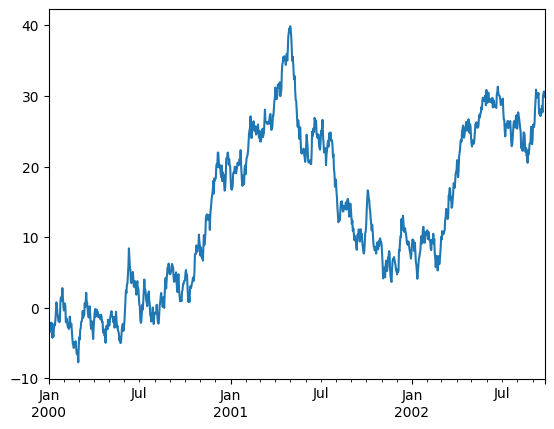

In [129]:
ts.plot();

In [130]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [131]:
df = df.cumsum()

In [132]:
plt.figure();

<Figure size 640x480 with 0 Axes>

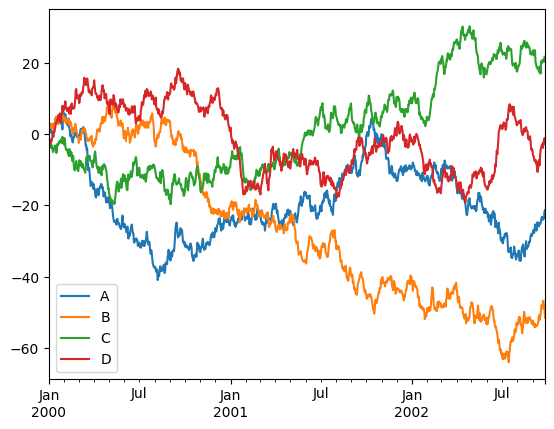

In [133]:
df.plot();

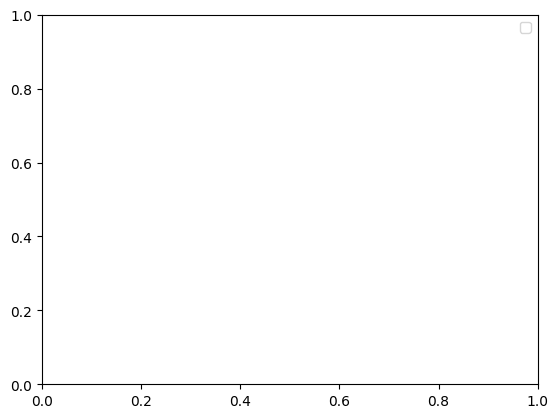

In [134]:
plt.legend(loc='best');

## Importing and exporting data

### CSV

In [135]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))

In [136]:
df.to_csv("foo.csv")

In [137]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,1,1,0,1,2
1,1,2,0,0,4,4
2,2,4,0,4,3,0
3,3,4,3,4,0,3
4,4,2,4,3,4,1
5,5,0,2,2,2,2
6,6,0,0,0,2,4
7,7,0,3,2,4,3
8,8,1,0,4,1,0
9,9,1,4,4,1,2


### Parquet

In [138]:
df.to_parquet("foo.parquet")

In [139]:
pd.read_parquet("foo.parquet")

,0,1,2,3,4
0,1,1,0,1,2
1,2,0,0,4,4
2,4,0,4,3,0
3,4,3,4,0,3
4,2,4,3,4,1
5,0,2,2,2,2
6,0,0,0,2,4
7,0,3,2,4,3
8,1,0,4,1,0
9,1,4,4,1,2


### Excel

In [140]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [141]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,1,1,0,1,2
1,1,2,0,0,4,4
2,2,4,0,4,3,0
3,3,4,3,4,0,3
4,4,2,4,3,4,1
5,5,0,2,2,2,2
6,6,0,0,0,2,4
7,7,0,3,2,4,3
8,8,1,0,4,1,0
9,9,1,4,4,1,2
